# Car prediction

### Data reading and Description

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
df = pd.read_csv("car data.csv")

In [63]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [65]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [66]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [67]:
df.shape

(301, 9)

In [68]:
df.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


## EDA

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

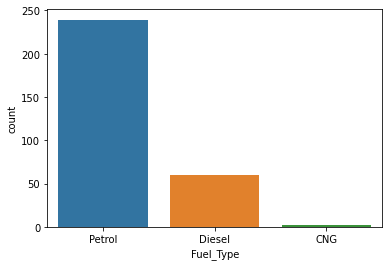

In [69]:
sns.countplot(data=df,x = 'Fuel_Type')

<AxesSubplot:xlabel='Transmission', ylabel='count'>

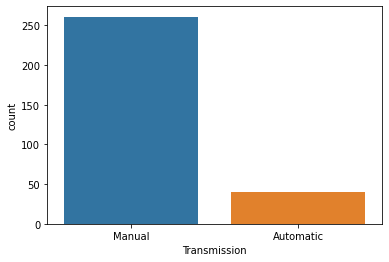

In [70]:
sns.countplot(data=df,x = 'Transmission')

<AxesSubplot:xlabel='Year', ylabel='count'>

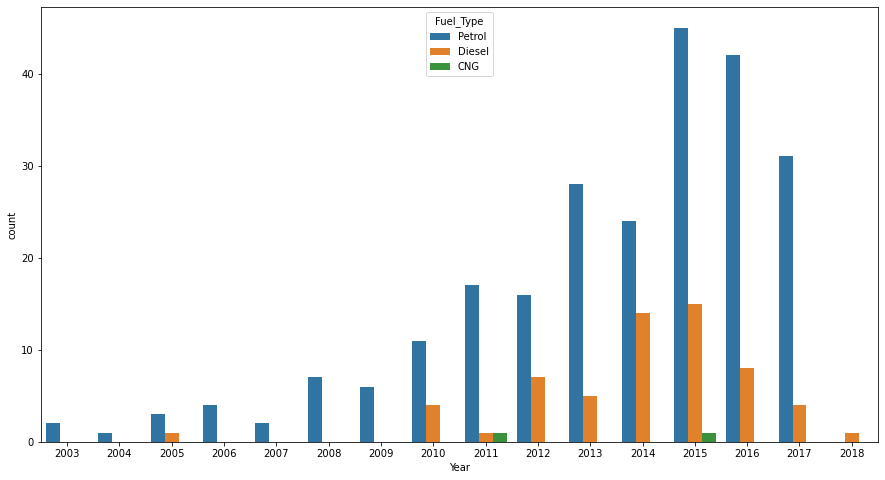

In [71]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x= 'Year',hue='Fuel_Type')

<AxesSubplot:xlabel='Selling_Price', ylabel='Present_Price'>

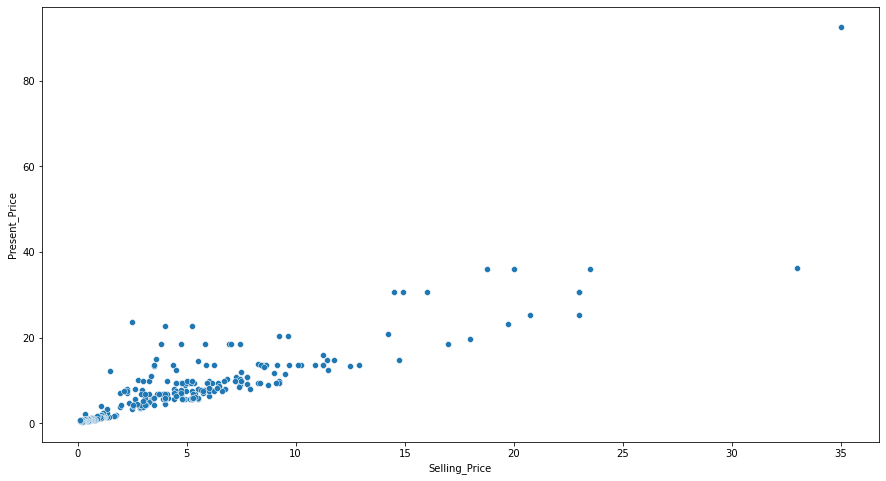

In [72]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df,x='Selling_Price',y='Present_Price')

### Data cleaning

In [73]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [74]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
5,vitara brezza,2018,9.25,9.83,2071,1,0,0,0
6,ciaz,2015,6.75,8.12,18796,0,0,0,0
7,s cross,2015,6.50,8.61,33429,1,0,0,0
8,ciaz,2016,8.75,8.89,20273,1,0,0,0
9,ciaz,2015,7.45,8.92,42367,1,0,0,0


In [75]:
df.Seller_Type.value_counts()

0    195
1    106
Name: Seller_Type, dtype: int64

In [76]:
df.Transmission.value_counts()

0    261
1     40
Name: Transmission, dtype: int64

In [77]:
df.Fuel_Type.value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [80]:
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [81]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

### Model Training

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()

In [84]:
lr.fit(X_train,y_train)

LinearRegression()

In [85]:
predictions = lr.predict(X_test)

In [86]:
from sklearn import metrics

In [87]:
metrics.r2_score(y_test,predictions)

0.8365766715026903

In [88]:
metrics.mean_absolute_error(y_test,predictions)

1.1516382156614589

In [89]:
predictions_train = lr.predict(X_train)

In [90]:
metrics.r2_score(y_train,predictions_train)

0.8799451660493698

In [91]:
metrics.mean_absolute_error(y_train,predictions_train)

1.2166174093912

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

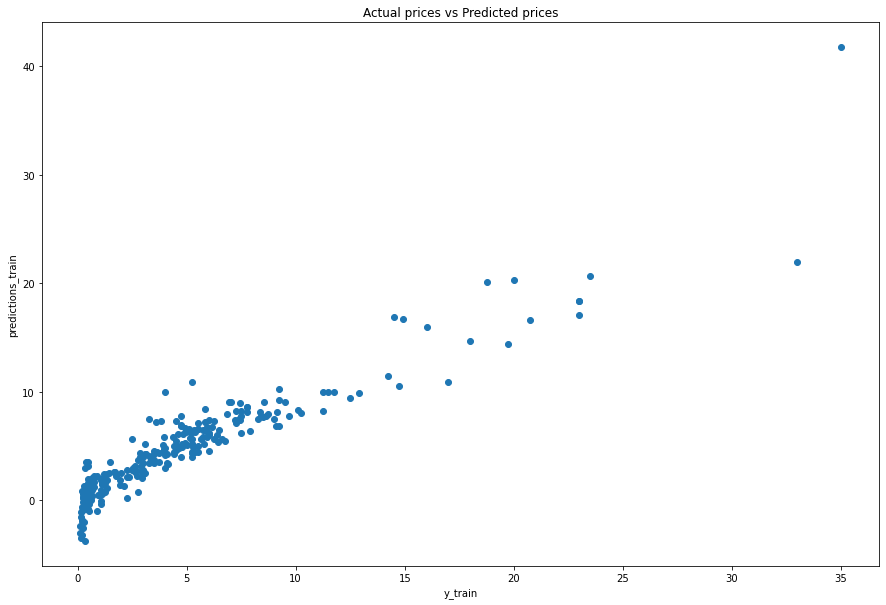

In [92]:
plt.figure(figsize=(15,10))
plt.scatter(y_train, predictions_train)
plt.xlabel('y_train')
plt.ylabel('predictions_train')
plt.title('Actual prices vs Predicted prices')

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

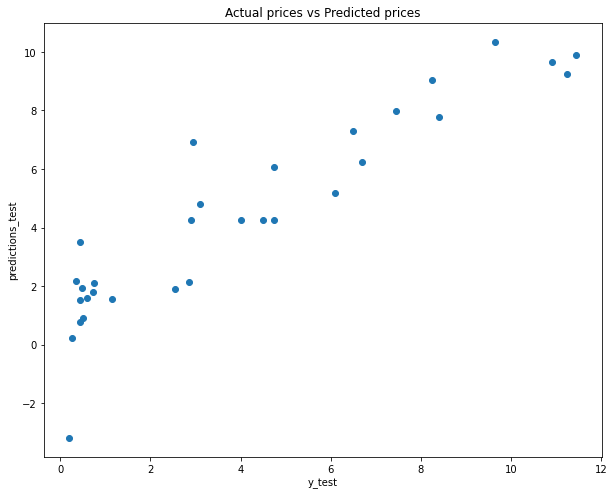

In [93]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions_test')
plt.title('Actual prices vs Predicted prices')

In [94]:
from sklearn.linear_model import Lasso

In [95]:
lasso = Lasso()

In [96]:
lasso.fit(X_train,y_train)

Lasso()

In [97]:
pred_lasso_train = lasso.predict(X_train)

In [98]:
metrics.r2_score(y_train,pred_lasso_train)

0.8427856123435794

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

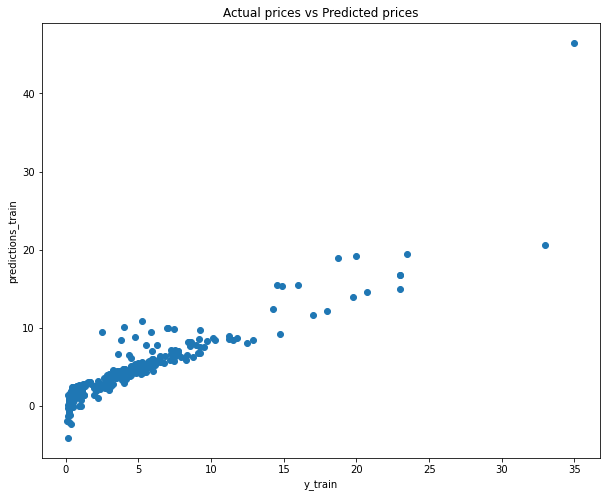

In [99]:
plt.figure(figsize=(10,8))
plt.scatter(y_train, pred_lasso_train)
plt.xlabel('y_train')
plt.ylabel('predictions_train')
plt.title('Actual prices vs Predicted prices')

In [100]:
pred_lasso_test = lasso.predict(X_test)

In [101]:
metrics.r2_score(y_test,pred_lasso_test)

0.8709167941173195

Text(0.5, 1.0, 'Actual prices vs Predicted prices')

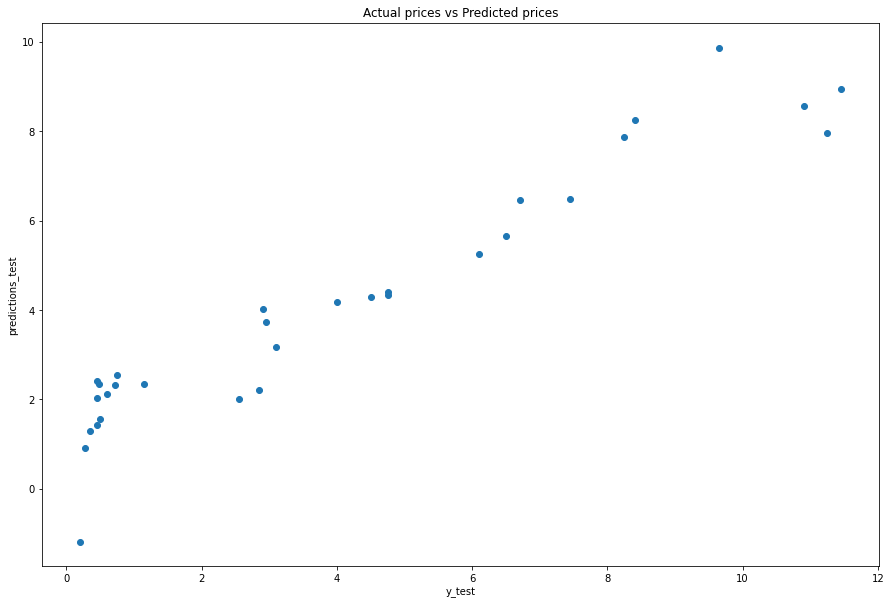

In [102]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, pred_lasso_test)
plt.xlabel('y_test')
plt.ylabel('predictions_test')
plt.title('Actual prices vs Predicted prices')